# Stanford CME 241 (Winter 2024) - Assignment 3

**Due: Jan 29 @ 11:59pm Pacific Time on Gradescope.**

Assignment instructions:
- **Please solve questions 1 and 2, and choose one of questions 3 or 4.**
- Empty code blocks are for your use. Feel free to create more under each section as needed.

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/neelsnarayan/cme241/blob/master/neel_mehdi_assignments/assignment3/Neel_Mehdi_Assignment3.ipynb

*Group members (replace below names with people in your group):* 
- Neel Narayan
- Mehdi Zhioua

## Imports

In [1]:
import numpy as np

## Question 1
**Analytic Optimal Actions and Cost.** 
Consider a continuous-states, continuous-actions, discrete-time, non-terminating MDP with state space as $\mathbb{R}$ and action space as $\mathbb{R}$. When in state $s\in \mathbb{R}$, upon taking action $a\in \mathbb{R}$, one transitions to next state $s' \in \mathbb{R}$ according to a normal distribution $s' \sim \mathcal{N}(s, \sigma^2)$ for a fixed variance $\sigma^2 \in \mathbb{R}^+$. The corresponding cost associated with this transition is $e^{as'}$, i.e., the cost depends on the action $a$ and the state $s'$ one transitions to. The problem is to minimize the infinite-horizon **Expected Discounted-Sum of Costs** (with discount factor $\gamma < 1$). For this assignment, solve this problem just for the special case of $\gamma = 0$ (i.e., the myopic case) using elementary calculus. Derive an analytic expression for the optimal action in any state and the corresponding optimal cost.


The myopic case boils down to maximize :
$$
\phi(s) = \mathbb{E}(e^{as'})
$$
Where $s' \sim \mathcal{N}(s,\sigma^2)$. We recoginze here the moment generating funtion of the normal distribution, which is $\phi(s) = e^{as + \frac{\sigma^2 a^2}{2}}$. This is minimized for $a=\frac{-s}{\sigma^2}$
So we get the optimal policy :
$$
\pi^*(s) = \frac{-s}{\sigma^2}
$$
Plugging in the optimal value of $a$ gives the corresponding optimal cost : $e^{-\frac{s^2}{2 \sigma^2}}$

## Question 2
**Manual Value Iteration.** 
Consider a simple MDP with $\mathcal{S} = \{s_1, s_2, s_3\}, \mathcal{T} =\{s_3\}, \mathcal{A} = \{a_1, a_2\}$. The State Transition Probability function
$$\mathcal{P}: \mathcal{N} \times \mathcal{A} \times \mathcal{S} \rightarrow [0, 1]$$
is defined as:
$$\mathcal{P}(s_1, a_1, s_1) = 0.2, \mathcal{P}(s_1, a_1, s_2) = 0.6, \mathcal{P}(s_1, a_1, s_3) = 0.2$$
$$\mathcal{P}(s_1, a_2, s_1) = 0.1, \mathcal{P}(s_1, a_2, s_2) = 0.2, \mathcal{P}(s_1, a_2, s_3) = 0.7$$
$$\mathcal{P}(s_2, a_1, s_1) = 0.3, \mathcal{P}(s_2, a_1, s_2) = 0.3, \mathcal{P}(s_2, a_1, s_3) = 0.4$$
$$\mathcal{P}(s_2, a_2, s_1) = 0.5, \mathcal{P}(s_2, a_2, s_2) = 0.3, \mathcal{P}(s_2, a_2, s_3) = 0.2$$
The Reward Function 
$$\mathcal{R}: \mathcal{N} \times \mathcal{A} \rightarrow \mathbb{R}$$
is defined as:
$$\mathcal{R}(s_1, a_1) = 8.0, \mathcal{R}(s_1, a_2) = 10.0$$
$$\mathcal{R}(s_2, a_1) = 1.0, \mathcal{R}(s_2, a_2) = -1.0$$
Assume discount factor $\gamma = 1$.

Your task is to determine an Optimal Deterministic Policy **by manually working out** (not with code) simply the first two iterations of Value Iteration algorithm. 

- Initialize the Value Function for each state to be it's $\max$ (over actions) reward, i.e., we initialize the Value Function to be $v_0(s_1) = 10.0, v_0(s_2) = 1.0, v_0(s_3) = 0.0$. Then manually calculate $q_k(\cdot, \cdot)$ and $v_k(\cdot)$ from $v_{k - 1}( \cdot)$ using the Value Iteration update, and then calculate the greedy policy $\pi_k(\cdot)$ from $q_k(\cdot, \cdot)$ for $k = 1$ and $k = 2$ (hence, 2 iterations).
- Now argue that $\pi_k(\cdot)$ for $k > 2$ will be the same as $\pi_2(\cdot)$. Hint: You can make the argument by examining the structure of how you get $q_k(\cdot, \cdot)$ from $v_{k-1}(\cdot)$. With this argument, there is no need to go beyond the two iterations you performed above, and so you can establish $\pi_2(\cdot)$ as an Optimal Deterministic Policy for this MDP.

Using the given data, we observe that (having columns corresponding to the actions) :

$$
q_1(s,a) = 
\begin{pmatrix}
8 & 10\\
1 & -1
\end{pmatrix}
+ 
\begin{pmatrix}
0.2 & 0.1\\
0.3 & 0.5
\end{pmatrix} v_0(s_1)+
\begin{pmatrix}
0.6 & 0.2\\
0.3 & 0.3
\end{pmatrix} v_0(s_2)
= 
\begin{pmatrix}
10.6 & 11.2\\
4.3 & 4.3
\end{pmatrix}
$$

We have $v_k(s) = max_a q_k(s,a)$, so $v_1(s_1) = 11.2$ and $v_1(s_2) = 4.3$, associated with the greedy policy $\pi_1(s_1) = a_2 $ and $\pi_1(s_2) = a_1 \, \text{or} \, \, a_2$ Iterating again gives : 

$$
q_2(s,a) = 
\begin{pmatrix}
8 & 10\\
1 & -1
\end{pmatrix}
+ 
\begin{pmatrix}
0.2 & 0.1\\
0.3 & 0.5
\end{pmatrix} v_1(s_1)+
\begin{pmatrix}
0.6 & 0.2\\
0.3 & 0.3
\end{pmatrix} v_1(s_2)
= 
\begin{pmatrix}
12.82 & 11.98\\
5.65 & 5.89
\end{pmatrix}
$$

$v_2(s_1) = 12.82$ and $v_2(s_2) = 5.89$, associated with the greedy policy $\pi_2(s_1) = a_1 $ and $\pi_2(s_2) = a_2$

We first observe that future iterations will always lead to choose $\pi_{k+1}(s_1) = a_1$. Indeed, this is satisfied if and only if $q_{k+1}(s_1,a_1) \geq q_{k+1}(s_1,a_2) $, which is equivalent to :

$$
8 + 0.2 v_k(s_1) + 0.6 v_k(s_2) \geq 10 + 0.1 v_k(s_1) + 0.2 v_k(s_2)
$$
$$
\Leftrightarrow 0.1 v_k(s_1) + 0.4 v_k(s_2) \geq 2
$$

We know that the state values will only increase so $0.1 v_k(s_1) + 0.4 v_k(s_2) \geq 0.1 \times 12.82 + 0.4 \times 5.89 = 3.654 \geq 2$. 



## Question 3

**Job-Hopping and Wages-Utility-Maximization.** 
You are a worker who starts every day either employed or unemployed. If you start your day employed, you work on your job for the day (one of $n$ jobs, as elaborated later) and you get to earn the wage of the job for the day. However, at the end of the day, you could lose your job with probability $\alpha \in [0,1]$, in which case you start the next day unemployed. If at the end of the day, you do not lose your job (with probability $1-\alpha$), then you will start the next day with the same job (and hence, the same daily wage). On the other hand, if you start your day unemployed, then you will be randomly offered one of $n$ jobs with daily wages $w_1, w_2, \ldots w_n \in \mathbb{R}^+$ with respective job-offer probabilities $p_1, p_2, \ldots p_n \in [0,1]$ (with $\sum_{i=1}^n p_i = 1$). You can choose to either accept or decline the offered job. If you accept the job-offer, your day progresses exactly like the **employed-day** described above (earning the day's job wage and possibly (with probability $\alpha$) losing the job at the end of the day). However, if you decline the job-offer, you spend the day unemployed, receive the unemployment wage $w_0 \in \mathbb{R}^+$ for the day, and start the next day unemployed. The problem is to identify the optimal choice of accepting or rejecting any of the job-offers the worker receives, in a manner that maximizes the infinite-horizon **Expected Discounted-Sum of Wages Utility**. Assume the daily discount factor for wages (employed or unemployed) is $\gamma \in [0,1)$. Assume Wages Utility function to be $U(w) = \log(w)$ for any wage amount $w \in \mathbb{R}^+$. So you are looking to maximize
$$\mathbb{E}[\sum_{u=t}^\infty \gamma^{u-t} \cdot \log(w_{i_u})]$$
at the start of a given day $t$ ($w_{i_u}$ is the wage earned on day $u$, $0\leq i_u \leq n$ for all $u\geq t$).

- Express with clear mathematical notation the state space, action space, transition function, reward function, and write the Bellman Optimality Equation customized for this MDP.
- You can solve this Bellman Optimality Equation (hence, solve for the Optimal Value Function and the Optimal Policy) with a numerical iterative algorithm (essentially a Dynamic Programming algorithm customized to this problem). Write Python code for this numerical algorithm. Clearly define the inputs and outputs of your algorithm with their types (int, float, List, Mapping etc.). For this problem, don't use any of the MDP/DP code from the git repo, write this customized algorithm from scratch.

**State Space**
- We define $n+1$ states, $S = \{0, 1, 2, \dots, n\}$, where $s_0$ is the unemployed state and $s_i$ for $i \in [1, n]$ is the state that indicates the worker is in job $i$.

**Action Space**
- The action space is defined by $A = [a_0, a_1, a_2, \dots, a_n]$, where $a_0$ represents the agent rejecting the offered job and $a_i$, for $i \in [1, n]$, represents the agent accepting the offered job, $i$. The action space only truly exists when the agent is in the unemployed state, $s_0$, since the agent can take no action when they are employed (i.e. they must continue their job unless they lose it).

**Transition Function**
- We can define our probability transition function as $P_{ss'}^{a} = P(s'|s, a)$. If the agent is in an unemployed state, the two probability functions are as follows: 
$$P(s_i|s_0, a_i) = p_i$$
$$P(s_0|s_0, a_0) = 1$$
If the agent is in an employed state, the two probability functions are as follows:
$$P(s_i|s_i) = 1 - \alpha$$
$$P(s_0|s_i) = \alpha$$
The reason that the transition probability does not depend on the action in the case that the agent is already employed is that the agent loses their job (with probability $\alpha$) probabilistically, meaning that they cannot choose whether they stay employed or not; thus, the action is irrelevant.

**Reward Function**
- The reward function is defined as follows:
$$R(s_0, a_0) = \log(w_0)$$
$$R(s_0, a_i) = \log(w_i)$$
Trivially, if the agent is in an employed state, then the reward function becomes:
$$R(s_i, ) = \log(w_i)$$
since the agent can take no action when employed.

**Bellman Optimality Equation**
$$V^*(s) = \max_a \left\{ R(s,a) + \gamma \sum_{s'}P(s' | a, s) V^*(s') \right\}$$

We built our value iteration algorithm off of the following pseudocode (https://www.baeldung.com/cs/ml-value-iteration-vs-policy-iteration)

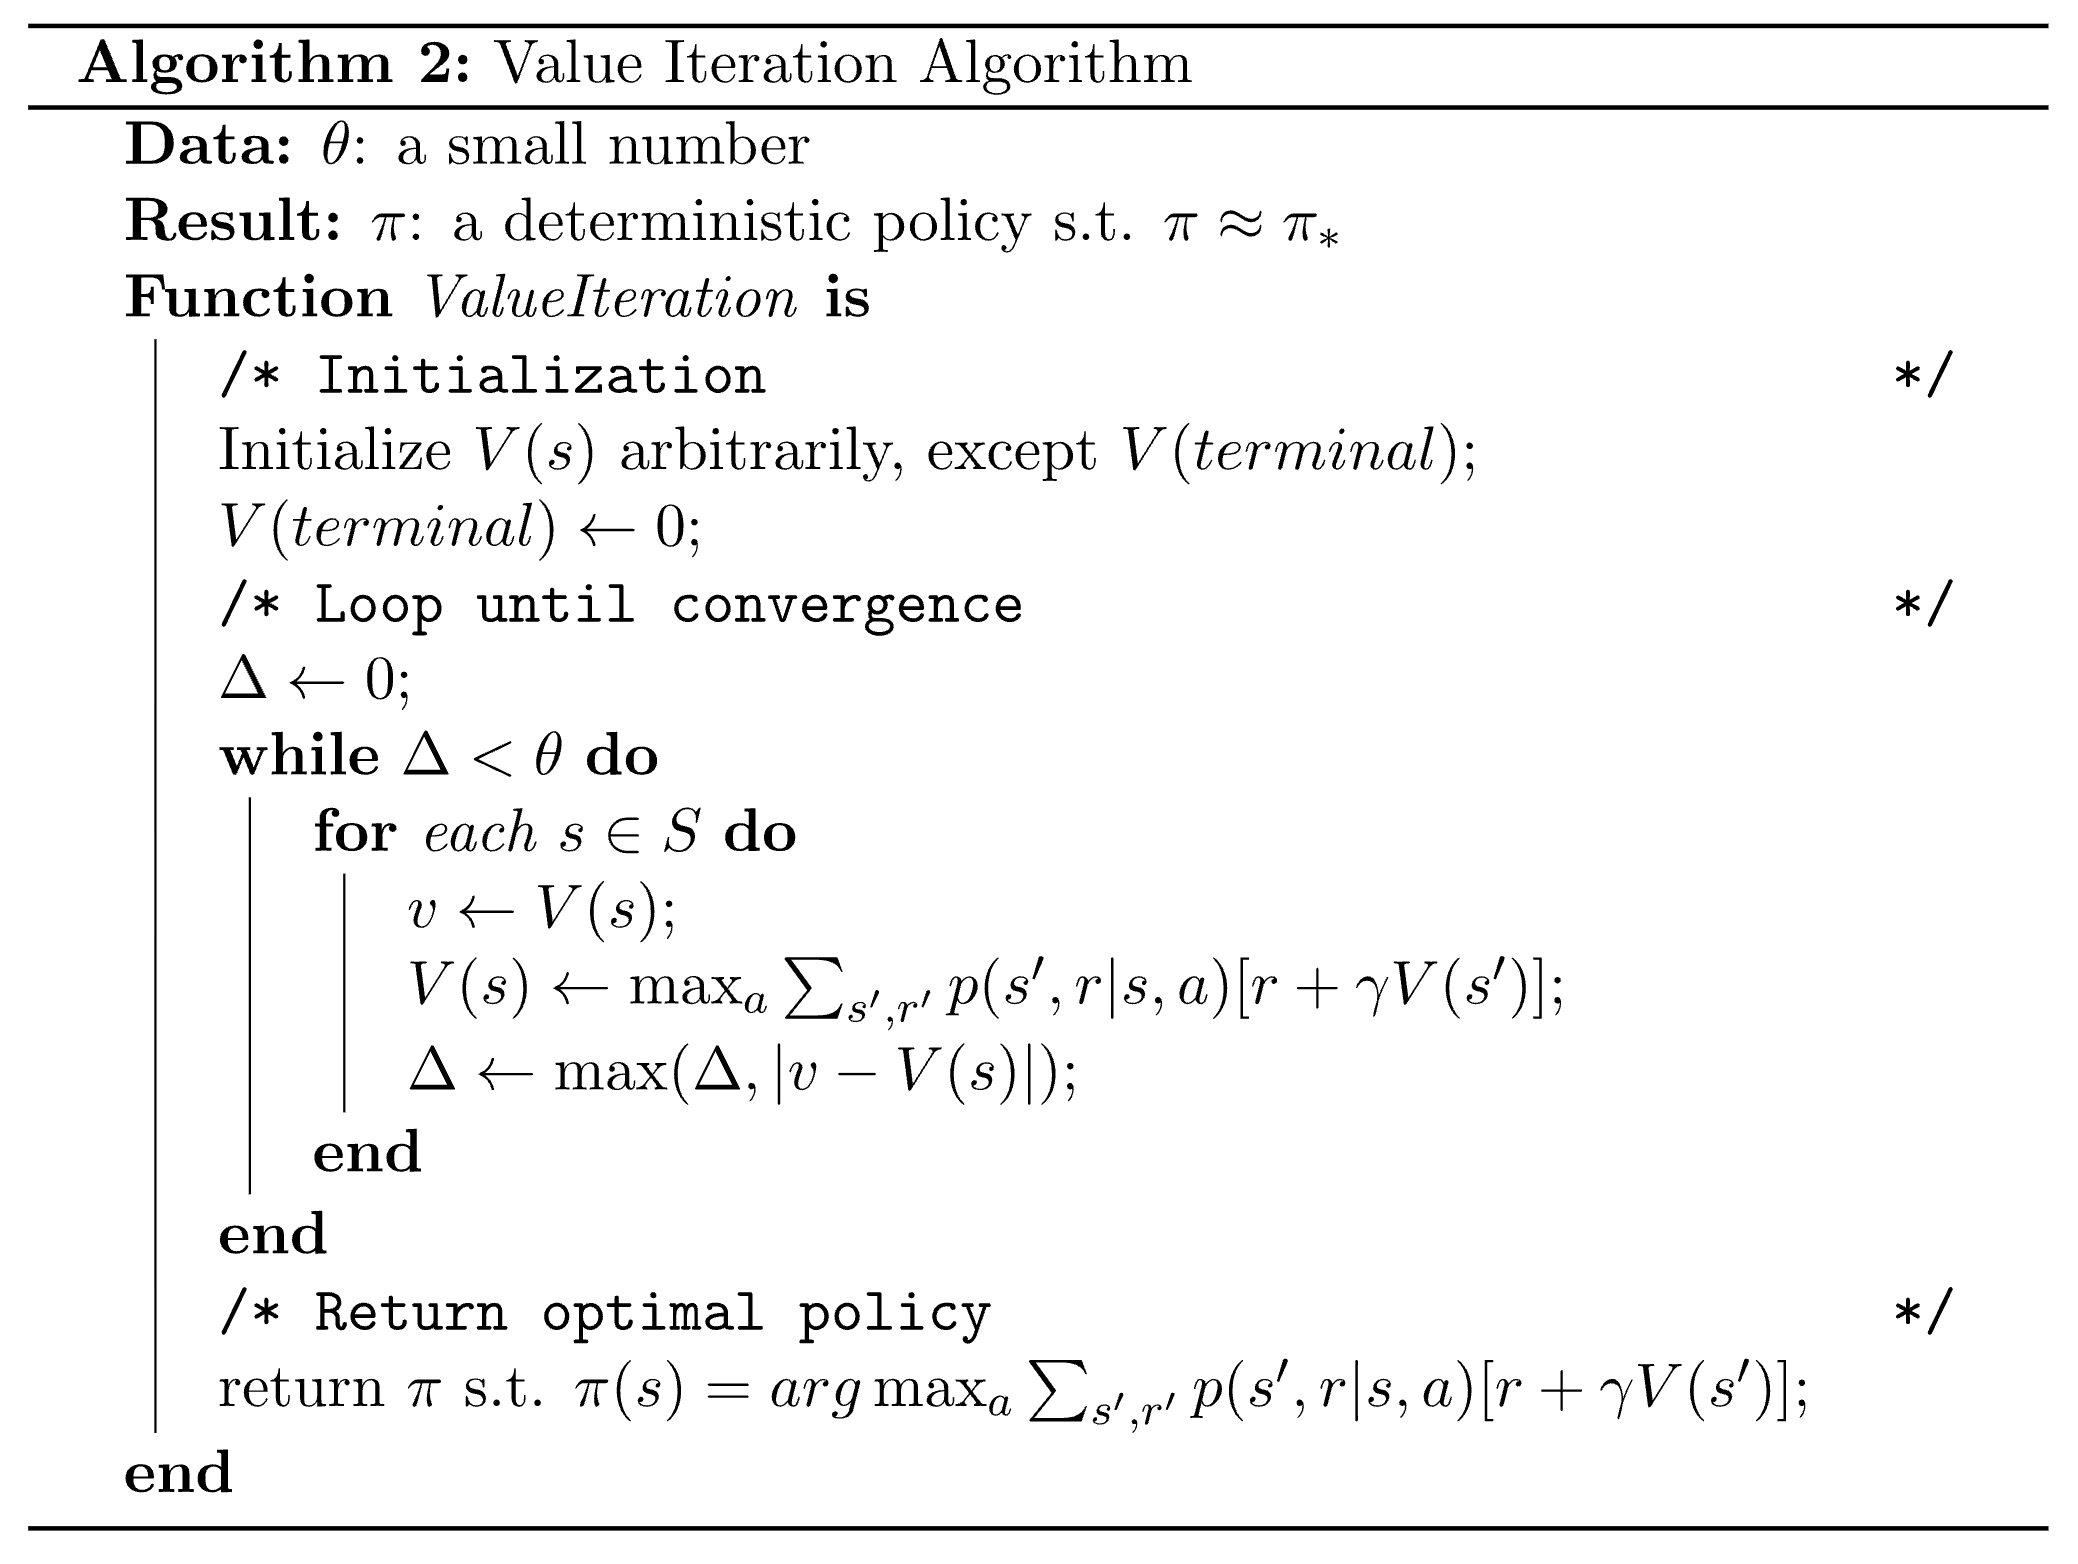

In [2]:
def utility(w):
    return np.log(w)

def valueIteration(w, p, a, u, g, t):
    V = np.zeros(len(w) + 1)
    policy = np.zeros(len(w) + 1, dtype=int)
    delta = 0
    
    while delta < t:
        for s in range(len(V)):
            v = V[s]

            # handles the case of agent being employed
            if s != 0:
                V[s] = utility(w[s - 1]) + g * (a * V[0] + (1 - a) * V[s])

            # handles the case of the agent being unemployed
            else:
                accept = p * (utility(w) + g * V[1:])
                reject = utility(u) + g * V[0]
                best = np.max(accept)
                V[s] = max(best, reject)
                policy[s] = np.argmax(accept) + 1 if best > reject else 0

            delta = max(delta, abs(v - V[s]))

    return V, policy

In [3]:
# sample data to test value iteration algorithm

# array of wages per job
w = np.array([10, 20, 30, 40, 50])
# probability of a given job being selected
p = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
# alpha - probability of agent losing job
a = 0.5
# w_0 - unemployment wage
u = 1
# gamma - daily discount factor
g = 0.9
# tolerance
t = 1e-6

V, policy = valueIteration(w, p, a, u, g, t)
print(V)
print(policy)

[0.7824046  2.65466716 3.34781434 3.75327945 4.04096152 4.26410508]
[5 0 0 0 0 0]


This makes sense for our inputs. If you start in state 0 (unemployed), the optimal choice is to accept job 5 since the wage is the higest. As seen from our value array, the highest utility occurs in state 5 (approx. 4.264), and the lowest in state 0 (approx. 0.782). That's why it doesn't make sense to reject the job if you're unemployed.

In [4]:
w = np.array([10, 10, 100, 10, 10])
p = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
a = 0.5
u = 1
g = 0.9
t = 1e-6
V, policy = valueIteration(w, p, a, u, g, t)
print(V)
print(policy)

[0.92103404 2.71705041 2.71705041 5.0196355  2.71705041 2.71705041]
[3 0 0 0 0 0]


Again, this output makes sense sinse the higest wage is in job 3, so the optimal action to take is to accept job offer 3 when unemployed. The reason that all of the other values are 0 is that when you are unemployed, you cannot take any action - you stay with the job until you are fired.

**Outputs:**
The V array is an array of expected utilities (floats) based on starting at a given state and taking the optimal action each time.
The policy array (ints) tells us the best action to take given the current state. When not in state 0, the policy array value will be 0 since no action can be taken when employed.

## Question 4

**Two-Stores Inventory Control.** 
We extend the capacity-constrained inventory example implemented in [rl/chapter3/simple_inventory_mdp_cap.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter3/simple_inventory_mdp_cap.py) as a `FiniteMarkovDecisionProcess` (the Finite MDP model for the capacity-constrained inventory example is described in detail in Chapters 1 and 2 of the RLForFinanceBook). Here we assume that we have two different stores, each with their own separate capacities $C_1$ and $C_2$, their own separate Poisson probability distributions of demand (with means $\lambda_1$ and $\lambda_2$), their own separate holding costs $h_1$ and $h_2$, and their own separate stockout costs $p_1$ and $p_2$. At 6pm upon stores closing each evening, each store can choose to order inventory from a common supplier (as usual, ordered inventory will arrive at the store 36 hours later). We are also allowed to transfer inventory from one store to another, and any such transfer happens overnight, i.e., will arrive by 6am next morning (since the stores are fairly close to each other). Note that the orders are constrained such that following the orders on each evening, each store's inventory position (sum of on-hand inventory and on-order inventory) cannot exceed the store's capacity (this means the action space is constrained to be finite). Each order made to the supplier incurs a fixed transportation cost of $K_1$ (fixed-cost means the cost is the same no matter how many units of non-zero inventory a particular store orders). Moving any non-zero inventory between the two stores incurs a fixed transportation cost of $K_2$. 

Model this as a derived class of `FiniteMarkovDecisionProcess` much like we did for `SimpleInventoryMDPCap` in the code repo. Set up instances of this derived class for different choices of the problem parameters (capacities, costs etc.), and determine the Optimal Value Function and Optimal Policy by invoking the function `value_iteration` (or `policy_iteration`) from file [rl/dynamic_programming.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/dynamic_programming.py).

Analyze the obtained Optimal Policy and verify that it makes intuitive sense as a function of the problem parameters.